In [30]:
from pyspectra.readers.read_spc import read_spc
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.signal import find_peaks

In [36]:
filepath = 'C:/Users/user/Desktop/Raw data/Raman/27.12.2024/2024_12_27 Ilin/Spectrum_(LS6)-2024_12_27-ID_32.spc'
filename = os.path.basename(filepath)

# Read the SPC file and plot with the filename as the label
spc = read_spc(filepath)

x-y(1)


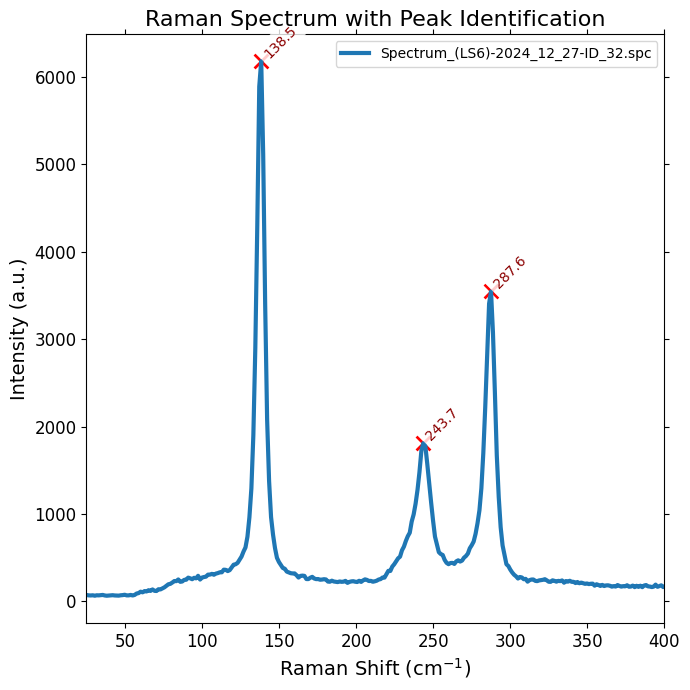

Detected peak positions: [287.5798645  243.6619873  138.45114136]
772.530273    197.0
771.360962    211.0
770.191467    195.0
769.021790    215.0
767.851990    197.0
dtype: float64


In [41]:
#  intensity
y_raw = spc.to_numpy() 
# raman shift
x_raw = spc.index.to_numpy()

# Select data in the range 0 to 400 Raman shift
mask = (x_raw >= 25) & (x_raw <= 400)
x = x_raw[mask]
y = y_raw[mask]
# Find prominent peaks (adjust parameters as needed)
peaks, _ = find_peaks(y, height=100, prominence=50, distance=10)
peak_positions = x[peaks]

# Create plot
ax = spc.plot(label=filename, figsize=(7, 7), linewidth = 3)

# Plot settings
plt.xlim(25, 400)
plt.xlabel('Raman Shift (cm$^{-1}$)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
plt.title('Raman Spectrum with Peak Identification', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12, top=True, right=True)

# Mark peaks and annotate positions
for peak_x, peak_y in zip(peak_positions, y[peaks]):
    ax.scatter(peak_x, peak_y, color='red', marker='x', s=100, linewidth=2)
    ax.text(peak_x, peak_y, f'{peak_x:.1f}', 
            ha='left', va='bottom', 
            fontsize=10, color='darkred',
            rotation=45,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.legend()
plt.tight_layout()
plt.show()

print("Detected peak positions:", peak_positions)
print(spc.head())

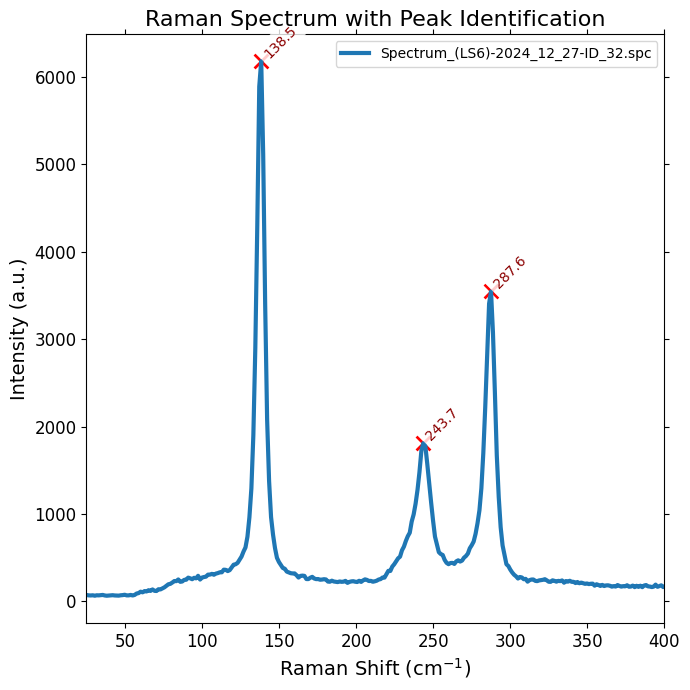

Detected peak positions: [287.5798645  243.6619873  138.45114136]
772.530273    197.0
771.360962    211.0
770.191467    195.0
769.021790    215.0
767.851990    197.0
dtype: float64


In [ ]:


# Select data in the range 0 to 400 Raman shift
mask = (x_raw >= 25) & (x_raw <= 400)
x = x_raw[mask]
y = y_raw[mask]

# Find prominent peaks (adjust parameters as needed)
peaks, _ = find_peaks(y, height=100, prominence=50, distance=10)
peak_positions = x[peaks]

# Create plot
ax = spc.plot(label=filename, figsize=(7, 7), linewidth=3)

# Plot settings
plt.xlim(25, 400)
plt.xlabel('Raman Shift (cm$^{-1}$)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
plt.title('Raman Spectrum for "Sample name"', fontsize=16)

# Enable ticks on all sides (top, bottom, left, right)
ax.tick_params(axis='both', which='major', labelsize=12, top=True, right=True)

# Mark peaks and annotate positions
for peak_x, peak_y in zip(peak_positions, y[peaks]):
    ax.scatter(peak_x, peak_y, color='red', marker='x', s=100, linewidth=2)
    ax.text(peak_x, peak_y, f'{peak_x:.1f}', 
            ha='left', va='bottom', 
            fontsize=10, color='darkred',
            rotation=45,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.legend()
plt.tight_layout()
plt.show()

print("Detected peak positions:", peak_positions)
print(spc.head())

In [ ]:
# Configure directory and parameters
directory = 'C:/Users/user/Desktop/Raw data/Raman/27.12.2024/2024_12_27 Ilin/'  # ← Change to your directory
peak_params = {
    'height': 100,   # Minimum peak height
    'prominence': 50,  # Minimum peak prominence
    'distance': 10    # Minimum distance between peaks
}

def process_and_plot(filepath):
    """Process single SPC file and create annotated plot"""
    # Load data and extract filename
    spc = read_spc(filepath)
    filename = os.path.basename(filepath)
    
    # Extract and filter data
    x_raw = spc.index.to_numpy()
    y_raw = spc.to_numpy()
    mask = (x_raw >= 25) & (x_raw <= 400)
    x, y = x_raw[mask], y_raw[mask]
    
    # Detect peaks
    peaks, _ = find_peaks(y, **peak_params)
    peak_positions = x[peaks]
    
    # Create figure with proper tick directions
    plt.figure(figsize=(7, 7))
    ax = spc.plot(linewidth=3, label=filename)
    
    # Configure axes
    plt.xlim(25, 400)
    plt.xlabel('Raman Shift (cm$^{-1}$)', fontsize=14)
    plt.ylabel('Intensity (a.u.)', fontsize=14)
    plt.title('Raman Spectrum for "Sample Name"', fontsize=16)
    
    # Set ticks on all sides pointing inward
    ax.tick_params(axis='both', which='major', direction='in',
                   top=True, right=True, labelsize=12)
    
    # Annotate peaks
    for peak_x, peak_y in zip(peak_positions, y[peaks]):
        ax.scatter(peak_x, peak_y, color='red', marker='x', 
                  s=100, linewidth=2, zorder=3)
        ax.text(peak_x, peak_y+50, f'{peak_x:.1f}',  # Offset text vertically
               ha='center', va='bottom', fontsize=10,
               color='darkred', rotation=45,
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.legend()
    plt.tight_layout()
    plt.savefig('C:/Users/user/Desktop/Pictures/27.12.2024 Raman/' + filename + '.png', dpi=300)


# Process all SPC files in directory
for fname in os.listdir(directory):
    if fname.endswith('.spc'):
        full_path = os.path.join(directory, fname)
        process_and_plot(full_path)


